# 02d - TS2 Skeletonization

## Setup

In [1]:
from discos import *
import numpy as np
import trimesh

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Load TS2 Mesh

In [2]:
# Load the TS2 mesh from the data directory
mesh_path = data_path("mesh/raw/TS2_alone.obj")

ts = trimesh.load(mesh_path)

mm = MeshManager(mesh=ts)
mm.repair_mesh()
mm.align_furthest_points_with_z()
mm.print_mesh_analysis()
mm.visualize_mesh_slice_interactive()


🔧 Mesh Repair Summary:
  • Inverted faces to fix negative volume: -3199890.36 → 3199890.36
  • Successfully filled holes - mesh is now watertight
  • Applied final mesh processing and validation

📊 Final Mesh Status:
  • Volume: 3764800.466500009
  • Watertight: True
  • Winding consistent: True
  • Faces: 2008
  • Vertices: 1004
Mesh Analysis Report

Geometry:
  * Vertices: 1004
  * Faces: 2008
  * Components: 1
  * Volume: 3764800.47
  * Bounds: [8696.3, 2707.0, 2250.0] to [8918.9, 2919.8, 2814.3]

Mesh Quality:
  * Watertight: True
  * Winding Consistent: True
  * Normal Direction: outward
  * Duplicate Vertices: 0
  * Degenerate Faces: 0

Topology:
  * Genus: 1
  * Euler Characteristic: 0

No issues detected

Recommendation:
  Mesh appears to be in good condition.


In [3]:
# save repaired mesh to new file
mm.save(data_path("mesh/processed/TS2_repaired.obj"), file_format="obj")

## Skeleton

<Axes: xlabel='x (horizontal)', ylabel='z (vertical)'>

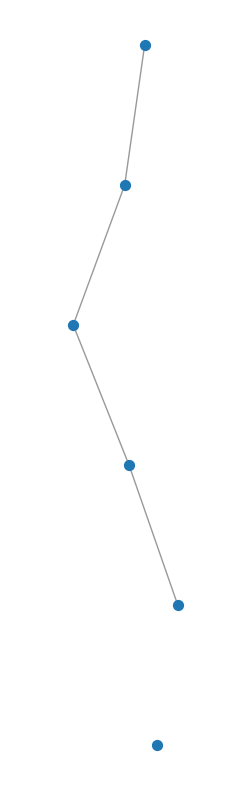

In [8]:
n_slices = 5
G = skeletonize(mm, n_slices=n_slices, verbose=True, enforce_connected=False)
G.draw(figsize=(10, 10))

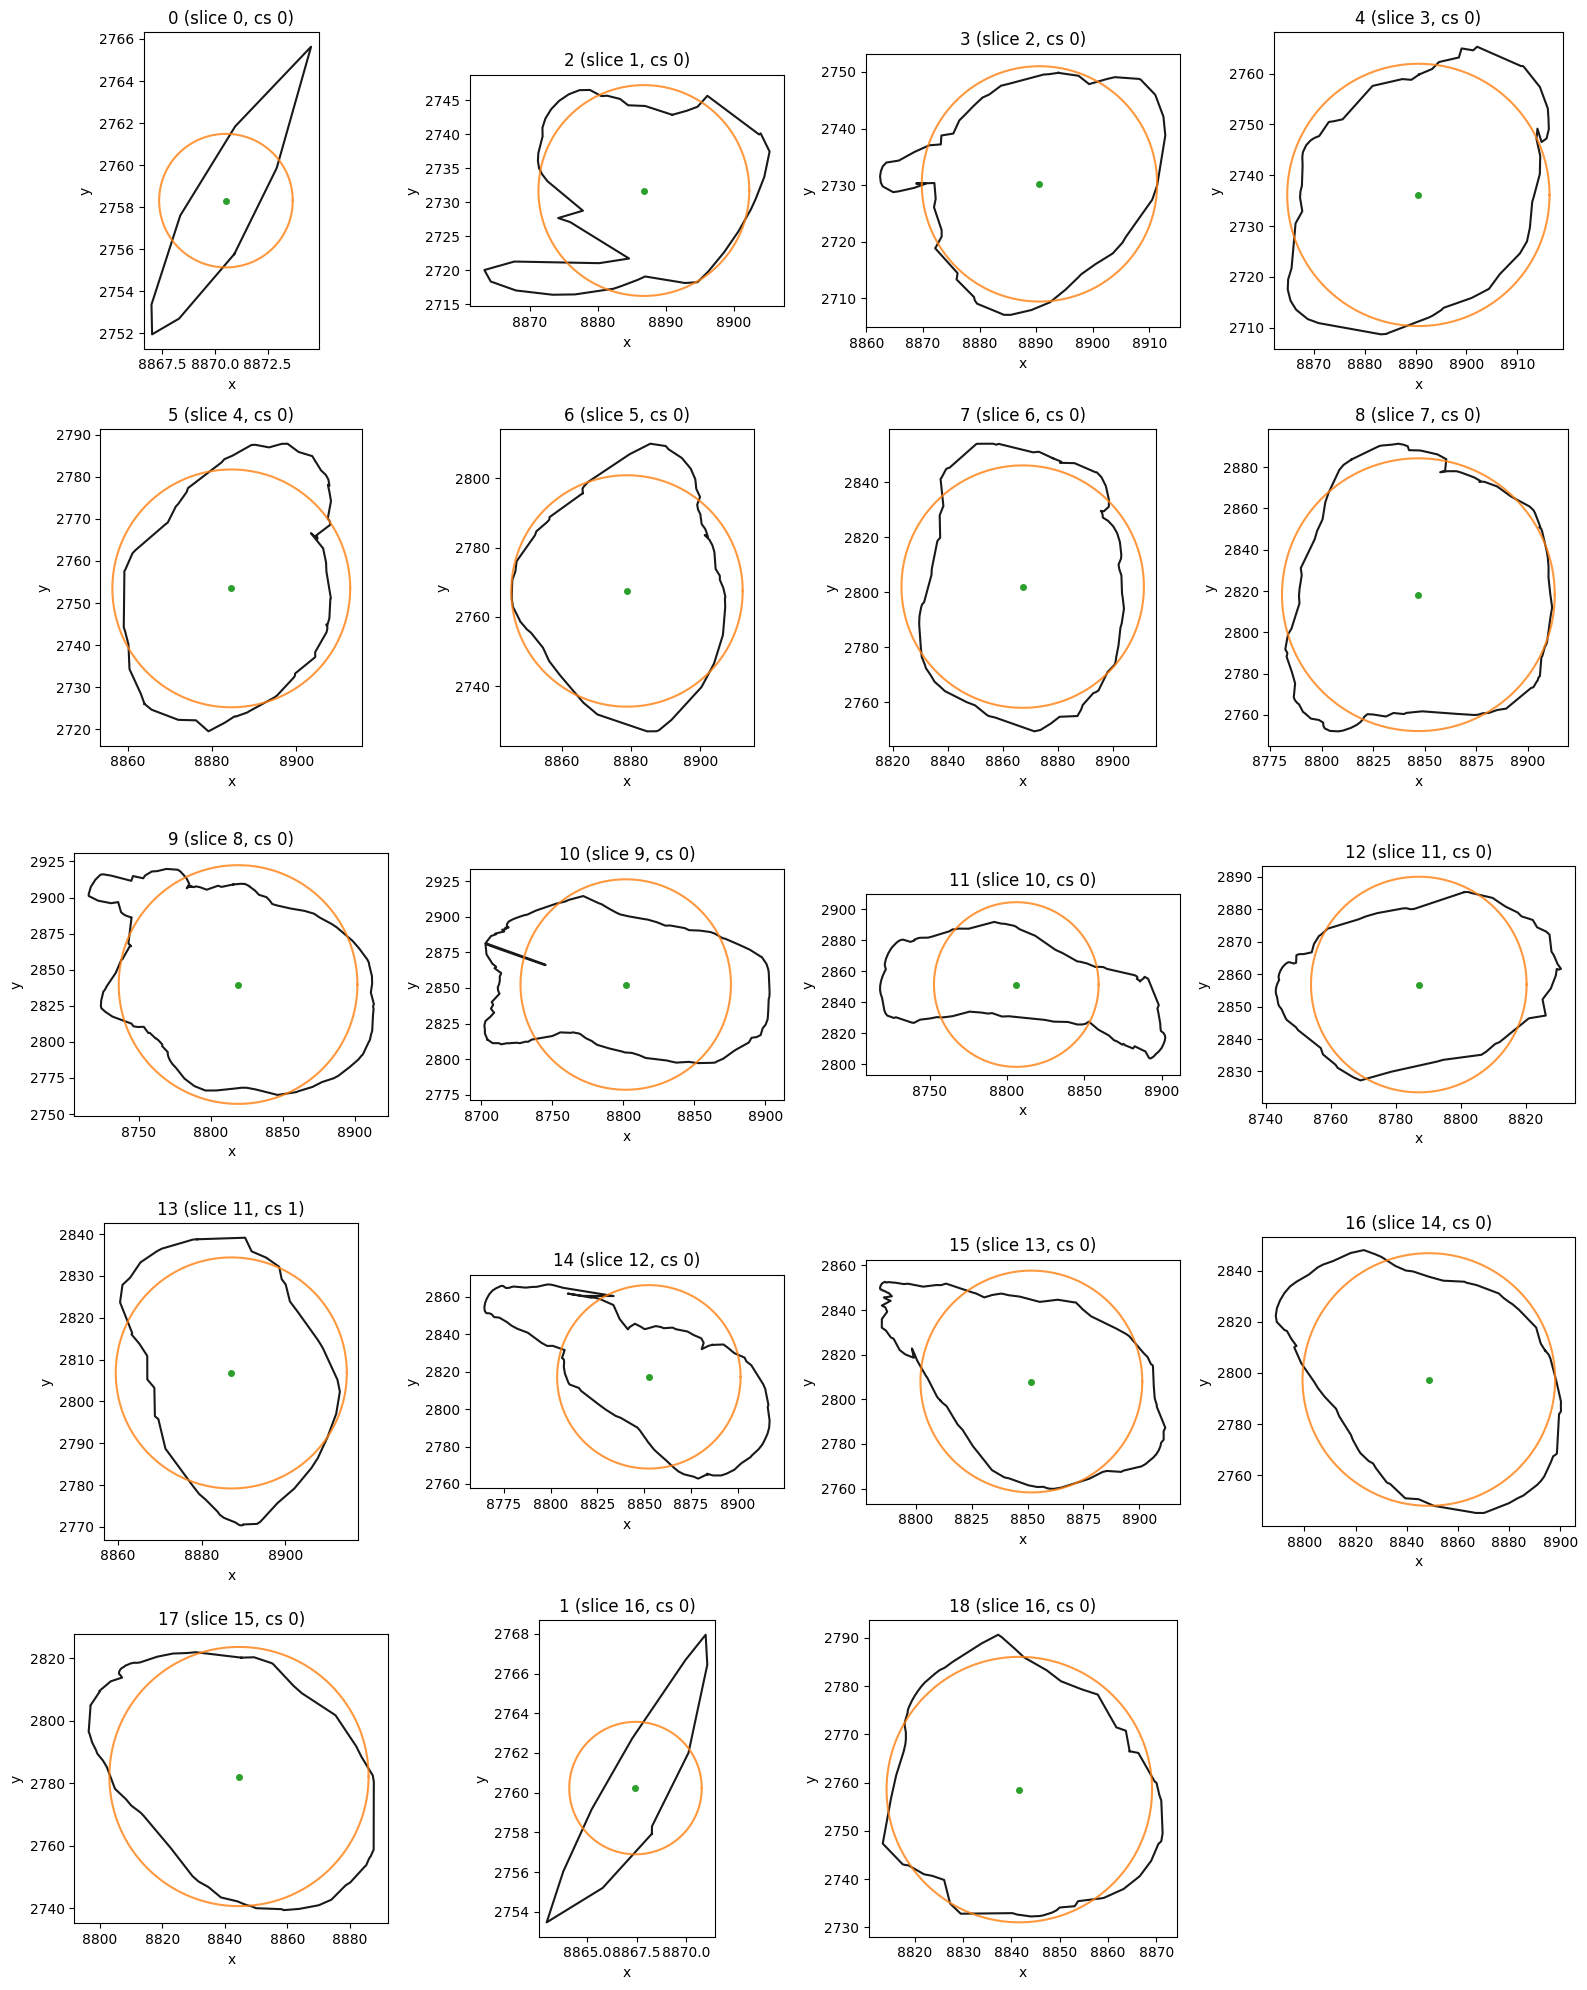

In [5]:
G.plot_all_cross_sections();

In [6]:
# write swc to file
G.to_swc(data_path(f"swc/TS2_n{n_slices}.swc"), cycle_mode="duplicate_junction")